In [4]:

import pandas as pd
from econml.dml import CausalForestDML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
pip install econml





     ---------------------------------------- 2.0/2.0 MB 455.8 kB/s eta 0:00:00
     ------------------------------------ 447.3/447.3 KB 508.8 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 624.3 kB/s eta 0:00:00
     ------------------------------------ 237.3/237.3 KB 242.3 kB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 800.5 kB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB 1.1 MB/s eta 0:00:00
     -------------------------------------- 28.1/28.1 MB 930.4 kB/s eta 0:00:00


You should consider upgrading via the 'c:\Python\Python39\python.exe -m pip install --upgrade pip' command.


Heterogeneous treatment effects using causal trees and forests

In [5]:
# Load the dataset
url = "https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv"
data = pd.read_csv(url)

# Display first few rows of the dataset
print("Dataset Loaded:")
print(data.head())

Dataset Loaded:
   treat  age  educ  black  hisp  marr  nodegree  re74  re75          re78
0      1   37    11      1     0     1         1   0.0   0.0   9930.045898
1      1   22     9      0     1     0         1   0.0   0.0   3595.894043
2      1   30    12      1     0     0         0   0.0   0.0  24909.449219
3      1   27    11      1     0     0         1   0.0   0.0   7506.145996
4      1   33     8      1     0     0         1   0.0   0.0    289.789886


In [6]:
# Step 2: Calculate the Average Treatment Effect (ATE)
outcome = "re78"
treatment = "treat"
control_group = data[data[treatment] == 0]
treatment_group = data[data[treatment] == 1]

# Calculate the ATE
ate = treatment_group[outcome].mean() - control_group[outcome].mean()
print(f"Average Treatment Effect (ATE): {ate}")

Average Treatment Effect (ATE): 1794.3423818501024


In [9]:
pip install --upgrade econml


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [14]:
# Step 3: Heterogeneous Effects with Causal Trees
# Prepare X, y, and treatment data
X = data.drop(columns=[outcome, treatment])
y = data[outcome]
d = data[treatment]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test, d_train, d_test = train_test_split(X, y, d, test_size=0.3, random_state=42)


First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


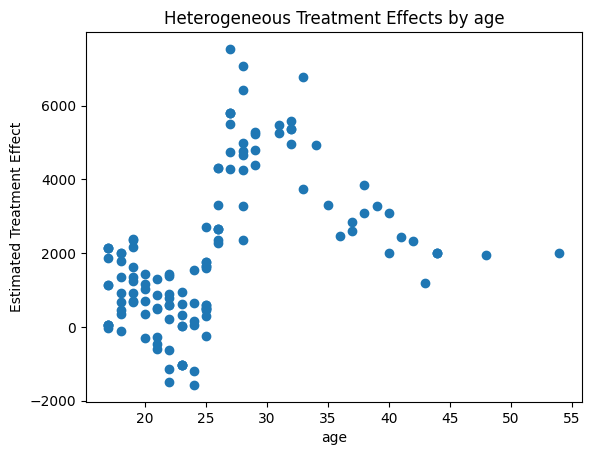

Estimated Treatment Effects: [ 7073.53815374   668.18807563  1428.54274488   462.61113491
  4734.21795738  2149.00918724  4940.05717455   217.58901629
   589.13875546  2009.09540809  2149.00918724  2281.69455897
  1357.59512011 -1027.61505569   652.85056912  4395.15072697
  1750.40782494  1796.79022668   771.93700011  -612.64444257
  2156.36842289  6772.69331689  5486.83490238   875.22903979
  5501.74293082  4654.3492519    -99.09658862  3860.45870685
  -282.21835393 -1194.05658557   491.37164262   579.73208573
  2704.88051652  2149.00918724   670.34169605  1189.62995794
  3727.13320437  1439.28233561  5263.53279912   509.12428527
   584.38616536  2014.64867365   919.07215287   943.24655744
  4957.45073245  -477.04204215  2643.56140019   880.36254386
  2002.86660386  1026.69531466   591.9765018    689.41762759
 -1574.24865494   -20.77030244  1309.34380232  1141.93934125
  2377.38566376    15.54630921  2343.52628694  2840.30435026
  4297.70594014  5569.47304625   303.08119454  2607.2346

In [15]:
# Modelo de CausalForestDML
model = CausalForestDML(model_y=RandomForestRegressor(),
                        model_t=RandomForestRegressor(),
                        discrete_treatment=True,
                        random_state=0)

# Entrenar el modelo
model.fit(y_train, d_train, X=X_train)

# Estimar los efectos del tratamiento en el conjunto de prueba
effects = model.effect(X_test)
# Visualizar los efectos del tratamiento para una variable específica
variable_to_plot = "age"  # Ejemplo: 'age' como variable para ver cómo cambia el efecto
plt.scatter(X_test[variable_to_plot], effects)
plt.xlabel(variable_to_plot)
plt.ylabel("Estimated Treatment Effect")
plt.title(f"Heterogeneous Treatment Effects by {variable_to_plot}")
plt.show()

# Mostrar los efectos de tratamiento estimados
print("Estimated Treatment Effects:", effects)

In [17]:

# Step 4: Heterogeneous Effects with Causal Forests
# Train causal forest
forest = CausalForestDML(model_y=RandomForestRegressor(),
                         model_t=RandomForestRegressor(),
                         discrete_treatment=True,
                         random_state=0)
forest.fit(y, d, X=X, W=None)

# Feature importance
feature_importances = forest.feature_importances()
print("Causal Forest Feature Importances:")
print(feature_importances)



First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


Causal Forest Feature Importances:
[0.26359213 0.14545558 0.02055945 0.0099746  0.04885722 0.02729061
 0.21228727 0.27198314]


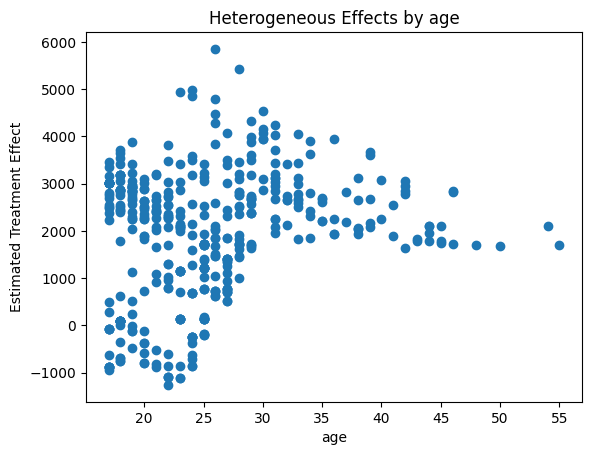

In [18]:
# Step 5: Plot Heterogeneous Effects
# Select a variable to analyze treatment effect
variable_to_plot = "age"  # Example variable
effects = forest.effect(X)

# Plot the treatment effect vs selected variable
plt.scatter(X[variable_to_plot], effects)
plt.xlabel(variable_to_plot)
plt.ylabel("Estimated Treatment Effect")
plt.title(f"Heterogeneous Effects by {variable_to_plot}")
plt.show()


Double/Debiased machine learning in observational data

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from econml.dml import LinearDML

In [20]:
# 2.1. Cargar los Datos
url = "https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/Labs/Assignment/Assignment_5/data/observational/biased_control.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos para ver la estructura
print(data.head())

   treat  age  educ  black  hisp  marr  nodegree       re74       re75  \
0      0   45    11      0     0     1         1  21.516670  25.243551   
1      0   21    14      0     0     0         0   3.175971   5.852565   
2      0   38    12      0     0     1         0  23.039020  25.130760   
3      0   48     6      0     0     1         1  24.994369  25.243551   
4      0   18     8      0     0     1         1   1.669295  10.727610   

        re78  agesq  agecube  educsq  u74  u75  interaction1      re74sq  \
0  25.564670   2025    91125     121    0    0    236.683369  462.967085   
1  13.496080    441     9261     196    0    0     44.463593   10.086791   
2  25.564670   1444    54872     144    0    0    276.468234  530.796421   
3  25.564670   2304   110592      36    0    0    149.966215  624.718489   
4   9.860869    324     5832      64    0    0     13.354360    2.786546   

       re75sq  
0  637.236856  
1   34.252516  
2  631.555086  
3  637.236856  
4  115.081624  


In [21]:
# Asumimos que las columnas relevantes son las siguientes:
outcome = "re78"  # Variable de resultado
treatment = "treat"  # Tratamiento
X = data.drop(columns=[outcome, treatment])  # Variables predictoras
y = data[outcome]  # Variable de resultado
d = data[treatment]  # Tratamiento

# Dividir en grupos de tratamiento y control
treatment_group = data[data[treatment] == 1]
control_group = data[data[treatment] == 0]

In [29]:
# 2.2. Comparación de Grupos - Estadísticas Descriptivas
# Seleccionamos tres variables para comparar
# Ajusta las variables a comparar con las columnas disponibles
variables_to_compare = ["age", "educ", "black"]  # Usa las columnas correctas disponibles

# Verificar si hay valores nulos en las columnas seleccionadas
print(data[variables_to_compare].isnull().sum())



age      0
educ     0
black    0
dtype: int64


In [30]:
# Si hay valores nulos, eliminarlos o manejarlos
data_clean = data.dropna(subset=variables_to_compare)

In [31]:
# Comparar las estadísticas descriptivas para el grupo de tratamiento
treatment_group = data_clean[data_clean['treat'] == 1]
control_group = data_clean[data_clean['treat'] == 0]

# Estadísticas descriptivas para el grupo de tratamiento
print("\nEstadísticas del grupo de tratamiento:")
print(treatment_group[variables_to_compare].describe())


Estadísticas del grupo de tratamiento:
              age        educ       black
count  185.000000  185.000000  185.000000
mean    25.816216   10.345946    0.843243
std      7.155019    2.010650    0.364558
min     17.000000    4.000000    0.000000
25%     20.000000    9.000000    1.000000
50%     25.000000   11.000000    1.000000
75%     29.000000   12.000000    1.000000
max     48.000000   16.000000    1.000000


In [32]:

# Estadísticas descriptivas para el grupo de control
print("\nEstadísticas del grupo de control:")
print(control_group[variables_to_compare].describe())




Estadísticas del grupo de control:
                age          educ         black
count  15992.000000  15992.000000  15992.000000
mean      33.225238     12.027514      0.073537
std       11.045216      2.870846      0.261024
min       16.000000      0.000000      0.000000
25%       24.000000     11.000000      0.000000
50%       31.000000     12.000000      0.000000
75%       42.000000     13.000000      0.000000
max       55.000000     18.000000      1.000000


In [33]:
# 2.3. Calcular la SMD (Simple Difference of Means)
# Calculamos la diferencia de medias para cada variable seleccionada
for var in variables_to_compare:
    mean_treat = treatment_group[var].mean()
    mean_control = control_group[var].mean()
    print(f"\nDiferencia de medias para {var}:")
    print(f"Grupo de tratamiento: {mean_treat}")
    print(f"Grupo de control: {mean_control}")
    print(f"Diferencia de medias (SMD): {mean_treat - mean_control}")


Diferencia de medias para age:
Grupo de tratamiento: 25.816216216216215
Grupo de control: 33.2252376188094
Diferencia de medias (SMD): -7.409021402593186

Diferencia de medias para educ:
Grupo de tratamiento: 10.345945945945946
Grupo de control: 12.02751375687844
Diferencia de medias (SMD): -1.6815678109324939

Diferencia de medias para black:
Grupo de tratamiento: 0.8432432432432433
Grupo de control: 0.0735367683841921
Diferencia de medias (SMD): 0.7697064748590512


In [34]:
# 2.4. Uso de DML para estimación del ATE
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test, d_train, d_test = train_test_split(X, y, d, test_size=0.3, random_state=42)

# Ajustar el modelo de DML utilizando LinearDML de econml
model = LinearDML(model_y=RandomForestRegressor(),
                  model_t=RandomForestRegressor(),
                  discrete_treatment=True,
                  random_state=0)

# Ajustar el modelo con los datos de entrenamiento
model.fit(y_train, d_train, X=X_train)

# Estimar los efectos del tratamiento sobre el conjunto de prueba
effects = model.effect(X_test)

# Mostrar los efectos estimados del tratamiento
print("\nEfectos estimados del tratamiento:")
print(effects)


First stage model has discrete target but model is not a classifier!



Efectos estimados del tratamiento:
[-1.50715891 -5.11568933  4.53912892 ... -6.68813604 -3.49610047
  2.16825899]


First stage model has discrete target but model is not a classifier!


In [38]:
# Verificar si los modelos base están configurados y disponibles
if hasattr(model, 'model_y_') and hasattr(model, 'model_t_'):
    # Obtener predicciones del modelo de Y (resultado)
    y_pred = model.model_y_.predict(X_test)
    
    # Obtener predicciones del modelo de T (tratamiento)
    d_pred = model.model_t_.predict(X_test)
    
    # Calcular el MSE (Mean Squared Error)
    mse_y = mean_squared_error(y_test, y_pred)
    mse_d = mean_squared_error(d_test, d_pred)
    
    # Mostrar los resultados
    print(f"MSE para la predicción de Y: {mse_y}")
    print(f"MSE para la predicción de D: {mse_d}")
else:
    print("Los modelos base no están configurados correctamente en LinearDML.")

# Calcular los efectos causales estimados
try:
    effects = model.effect(X_test)
    print("\nEfectos estimados del tratamiento:")
    print(effects)
except Exception as e:
    print(f"Error al calcular los efectos causales: {e}")


Los modelos base no están configurados correctamente en LinearDML.

Efectos estimados del tratamiento:
[-1.50715891 -5.11568933  4.53912892 ... -6.68813604 -3.49610047
  2.16825899]
